<a href="https://colab.research.google.com/github/chavalvit-k/Predicting-Football-Player-Market-Values-with-XGBoost/blob/main/Predicting_Football_Player_Market_Values_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Football Player Market Values with <b>XGBoost</b> Using Football Manager 2023 Database

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# Import Dataset

In [ ]:
df = pd.read_csv("Football_Manager_2023_Database.csv")

# Explore Dataset

In [ ]:
df.shape

(146597, 70)

In [ ]:
df.head()

,UID,Name,Position,Age,Nat,Birth Region,Club,Division,Based,Height,Weight,Left Foot,Right Foot,Transfer Value,AP,Wage,CA,PA,Wor,Vis,Tec,Tea,Tck,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat.1,Mar,L Th,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Ada,Vers,Temp,Spor,Prof,Pres,Loy,Inj Pr,Imp M,Dirt,Cont,Cons,Amb,CR,HR,WR
0,98054634.0,Diego Mutombo,"D (C), DM",32.0,COD,Central Africa,Echallens RÃ©gion,Swiss First League Group 1,Switzerland (First League Group 1),189 cm,86 kg,Reasonable,Very Strong,Not for Sale,Â£300M,Â£300 p/w,68.0,88.0,7.0,6.0,6.0,5.0,13.0,12.0,6.0,11.0,5.0,5.0,7.0,4.0,12.0,11.0,3.0,2.0,13.0,10.0,12.0,5.0,5.0,2.0,5.0,1.0,4.0,13.0,5.0,5.0,7.0,4.0,8.0,6.0,10.0,7.0,14.0,6.0,17.0,12.0,13.0,10.0,13.0,12.0,11.0,6.0,19.0,6.0,8.0,10.0,11.0,"3,400","3,400","1,750"
1,30001596.0,Shorn Lowman,D (C),32.0,VIN,Caribbean,Avenues Utd,SVG Club Championship,St Vincent (Club Championship),188 cm,82 kg,Fairly Strong,Very Strong,Not for Sale,Â£300M,Â£15 p/w,55.0,60.0,6.0,3.0,5.0,5.0,9.0,10.0,5.0,13.0,1.0,6.0,8.0,2.0,12.0,9.0,2.0,3.0,11.0,8.0,11.0,1.0,5.0,6.0,1.0,1.0,7.0,13.0,1.0,1.0,12.0,6.0,8.0,6.0,11.0,10.0,5.0,7.0,18.0,9.0,15.0,11.0,9.0,13.0,11.0,14.0,7.0,5.0,7.0,10.0,10.0,"2,750","2,750",250
2,2100325.0,Willian,"AM (RL), ST (C)",35.0,BRA,South America (South),FLU,Brazilian National First Division,Brazil (First Division),171 cm,78 kg,Weak,Very Strong,Not for Sale,Â£300M,"Â£17,250 p/w",127.0,140.0,12.0,13.0,15.0,12.0,8.0,12.0,12.0,8.0,12.0,12.0,13.0,15.0,16.0,7.0,4.0,12.0,10.0,7.0,11.0,11.0,13.0,14.0,14.0,15.0,16.0,13.0,12.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,12.0,13.0,6.0,12.0,12.0,9.0,12.0,12.0,11.0,4.0,11.0,10.0,8.0,13.0,13.0,"6,405","6,405","3,411"
3,14005818.0,Nahuel ValiÃ±as,GK,33.0,ARG,South America (South),LujÃ¡n,Argentine Metropolitan C Zone,Argentina (Fourth Division AFA),192 cm,94 kg,Weak,Very Strong,Not for Sale,Â£300M,Â£725 p/w,98.0,100.0,11.0,9.0,10.0,10.0,2.0,12.0,11.0,12.0,4.0,5.0,11.0,7.0,10.0,1.0,1.0,2.0,10.0,15.0,6.0,4.0,9.0,5.0,2.0,5.0,11.0,12.0,1.0,3.0,12.0,11.0,11.0,9.0,7.0,12.0,10.0,12.0,13.0,1.0,14.0,12.0,11.0,12.0,11.0,6.0,8.0,10.0,6.0,12.0,10.0,"4,400","4,402","1,400"
4,58030741.0,Artur Nigmatullin,GK,31.0,RUS,North Eastern Europe,Pari NN,Russian Premier League,Russia (Premier League),194 cm,91 kg,Weak,Very Strong,Not for Sale,Â£300M,"Â£10,500 p/w",104.0,116.0,12.0,6.0,8.0,9.0,3.0,16.0,10.0,12.0,10.0,8.0,10.0,9.0,12.0,3.0,2.0,1.0,11.0,16.0,3.0,6.0,1.0,8.0,2.0,3.0,11.0,10.0,1.0,4.0,12.0,11.0,14.0,14.0,12.0,10.0,8.0,7.0,17.0,11.0,8.0,12.0,12.0,14.0,15.0,5.0,12.0,6.0,6.0,11.0,9.0,"5,250","5,250","2,250"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146597 entries, 0 to 146596
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             146423 non-null  float64
 1   Name            146423 non-null  object 
 2   Position        146423 non-null  object 
 3   Age             146423 non-null  float64
 4   Nat             146423 non-null  object 
 5   Birth Region    146423 non-null  object 
 6   Club            146423 non-null  object 
 7   Division        146423 non-null  object 
 8   Based           146423 non-null  object 
 9   Height          146423 non-null  object 
 10  Weight          146423 non-null  object 
 11  Left Foot       146423 non-null  object 
 12  Right Foot      146423 non-null  object 
 13  Transfer Value  146423 non-null  object 
 14  AP              146423 non-null  object 
 15  Wage            142915 non-null  object 
 16  CA              146423 non-null  float64
 17  PA        

In [ ]:
df.describe()

,UID,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat.1,Mar,L Th,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Ada,Vers,Temp,Spor,Prof,Pres,Loy,Inj Pr,Imp M,Dirt,Cont,Cons,Amb
count,1.464230e+05,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.00000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000,146423.000000
mean,8.959009e+08,22.965975,77.205084,98.257248,9.795695,7.971302,9.235858,8.959754,7.770070,7.513649,9.172104,8.366500,5.253519,9.195850,11.165486,8.135150,11.901996,7.132247,4.682195,6.565198,8.100237,8.973693,7.624089,5.986532,8.026936,9.519898,7.095101,7.592701,10.589347,10.579472,7.045444,5.916079,8.301428,8.39181,8.835197,8.592141,9.086755,11.054104,10.197332,11.399165,12.743783,10.809258,13.772932,10.779188,11.333028,10.956824,11.100729,8.653012,9.249394,8.889922,5.444650,11.085314,11.065365
std,9.695358e+08,5.527916,24.586437,23.729175,2.890444,3.096936,3.337468,3.024100,4.082944,3.491518,3.327263,3.128669,3.417822,2.841723,2.224577,3.560137,2.657604,3.570744,3.068788,3.249217,3.633078,3.484005,3.740362,2.995251,3.709415,3.287466,3.802710,3.920722,4.151956,2.543628,3.605769,2.818419,2.791919,2.78380,3.356993,2.985091,2.695028,2.229938,3.091549,2.302773,3.998243,2.910889,3.612412,2.432272,1.959639,1.915925,2.006950,3.119507,4.061862,3.089629,3.075861,3.496852,2.151790
min,1.113300e+04,14.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.612816e+07,18.000000,62.000000,85.000000,8.000000,6.000000,7.000000,7.000000,4.000000,5.000000,7.000000,6.000000,3.000000,7.000000,10.000000,6.000000,10.000000,4.000000,2.000000,4.000000,5.000000,7.000000,5.000000,4.000000,5.000000,8.000000,4.000000,4.000000,8.000000,9.000000,4.000000,4.000000,6.000000,6.00000,7.000000,7.000000,7.000000,10.000000,8.000000,10.000000,10.000000,9.000000,11.000000,10.000000,10.000000,10.000000,10.000000,6.000000,6.000000,6.000000,3.000000,9.000000,10.000000
50%,8.507454e+07,22.000000,80.000000,100.000000,10.000000,8.000000,10.000000,8.000000,8.000000,7.000000,10.000000,8.000000,5.000000,9.000000,12.000000,8.000000,12.000000,7.000000,4.000000,7.000000,8.000000,9.000000,8.000000,6.000000,8.000000,10.000000,7.000000,8.000000,11.000000,11.000000,7.000000,6.000000,8.000000,8.00000,9.000000,8.000000,9.000000,11.000000,10.000000,12.000000,12.000000,11.000000,14.000000,11.000000,11.000000,11.000000,11.000000,8.000000,10.000000,9.000000,5.000000,11.000000,11.000000
75%,2.000145e+09,27.000000,93.000000,115.000000,12.000000,10.000000,12.000000,11.000000,11.000000,10.000000,12.000000,11.000000,7.000000,11.000000,13.000000,11.000000,14.000000,10.000000,7.000000,9.000000,11.000000,12.000000,10.000000,8.000000,11.000000,12.000000,10.000000,11.000000,14.000000,13.000000,10.000000,8.000000,10.000000,10.00000,11.000000,11.000000,11.000000,13.000000,13.000000,13.000000,16.000000,13.000000,17.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,11.000000,7.000000,13.000000,12.000000
max,2.002115e+

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'CA'}>,
        <Axes: title={'center': 'PA'}>, <Axes: title={'center': 'Wor'}>,
        <Axes: title={'center': 'Vis'}>, <Axes: title={'center': 'Tec'}>,
        <Axes: title={'center': 'Tea'}>],
       [<Axes: title={'center': 'Tck'}>, <Axes: title={'center': 'Str'}>,
        <Axes: title={'center': 'Sta'}>, <Axes: title={'center': 'Pos'}>,
        <Axes: title={'center': 'Pen'}>, <Axes: title={'center': 'Pas'}>,
        <Axes: title={'center': 'Pac'}>],
       [<Axes: title={'center': 'OtB'}>,
        <Axes: title={'center': 'Nat.1'}>,
        <Axes: title={'center': 'Mar'}>,
        <Axes: title={'center': 'L Th'}>,
        <Axes: title={'center': 'Lon'}>, <Axes: title={'center': 'Ldr'}>,
        <Axes: title={'center': 'Jum'}>],
       [<Axes: title={'center': 'Hea'}>, <Axes: title={'center': 'Fre'}>,
        <Axes: title={'center': 'Fla'}>, <Axes: title={'center': 'Fir'}>,
        <Axes: title={'center': 'Fin'}>, <A

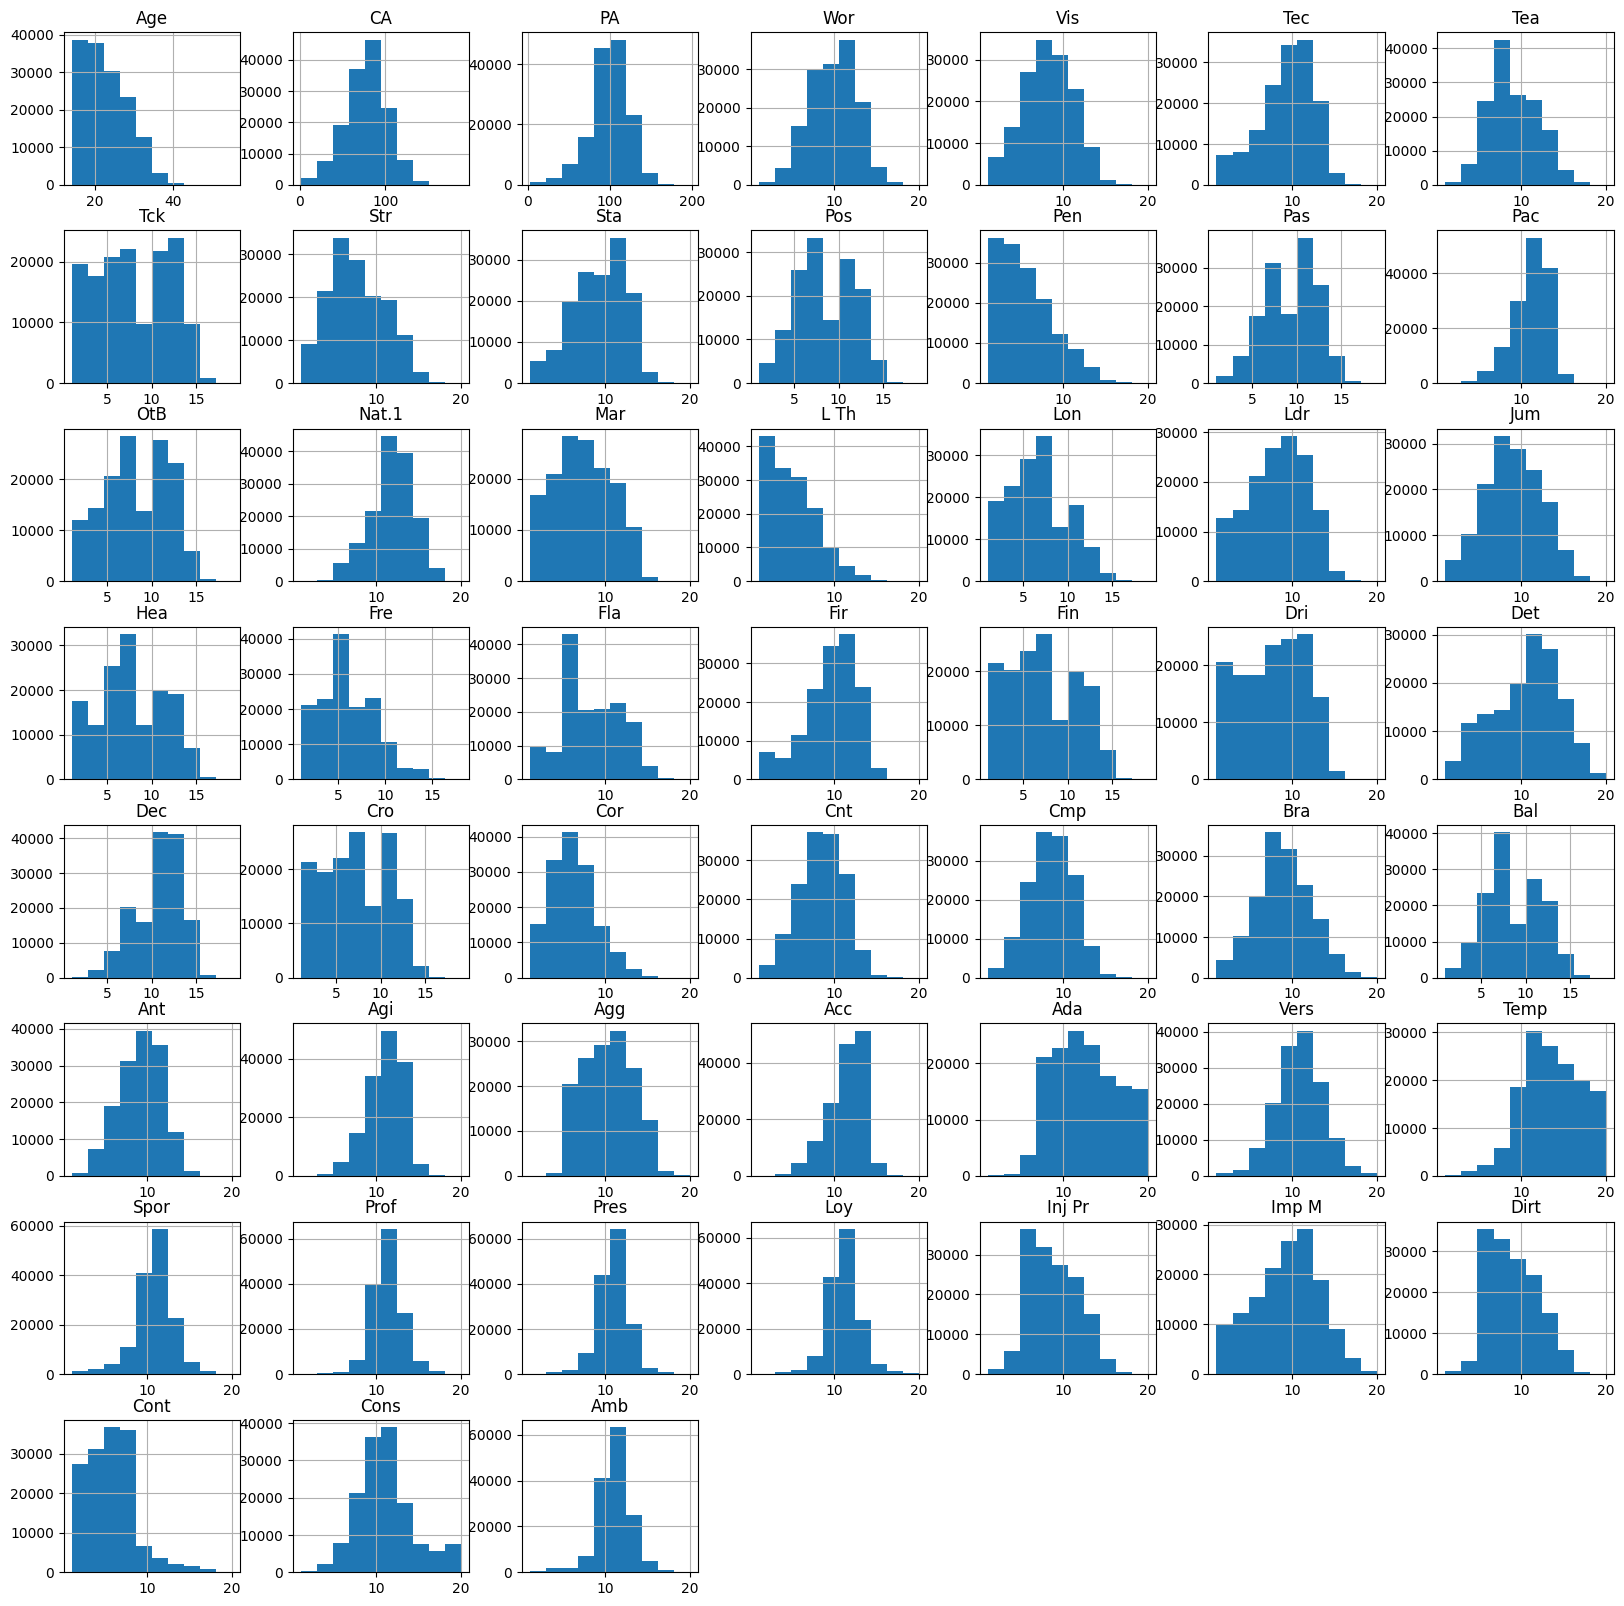

In [ ]:
numerical_df = df.select_dtypes(include=["number"]).drop("UID", axis=1)
numerical_df.hist(figsize=(20,20))

ในการพิจารณาจะไม่พิจารณา column `Height` `Weight` `Transfer Value` `AP` `Wage` `CR` `HR` และ `WR` เนื่องจากในความหมายจริง ๆ เป็น numerical variables แต่มี dtypes ของ pandas เป็น object เฉย ๆ

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).drop(["Height", "Weight", "Transfer Value", "AP", "Wage", "CR", "HR", "WR"], axis=1).columns
for col in categorical_cols:
  print(f"{col}, Unique Values = {df[col].nunique()}")

Name, Unique Values = 139622
Position, Unique Values = 820
Nat, Unique Values = 219
Birth Region, Unique Values = 24
Club, Unique Values = 9102
Division, Unique Values = 1188
Based, Unique Values = 1215
Left Foot, Unique Values = 6
Right Foot, Unique Values = 6


เนื่องจากจำนวน unique values ของ `Name` `Position` `Nat` `Division` และ `Based` มีเยอะมาก ๆ จึงแสดง count plot แค่ของ `Birth Region` `Left Foot` และ `Right Foot` เท่านั้น

<Axes: xlabel='Birth Region', ylabel='count'>

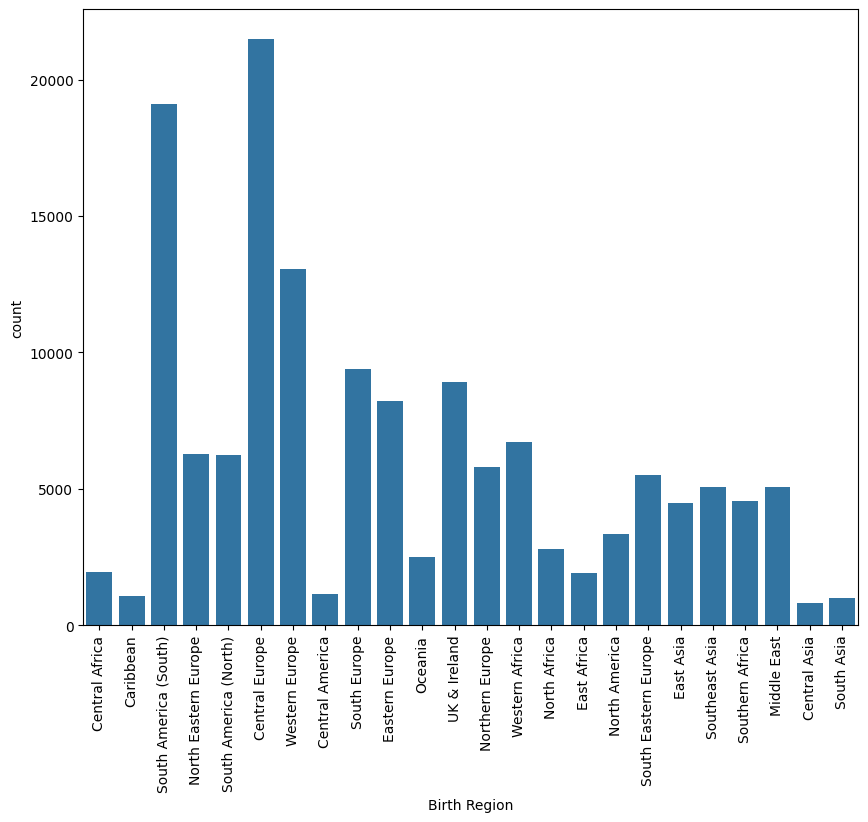

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot(x="Birth Region", data=df)

<Axes: xlabel='Left Foot', ylabel='count'>

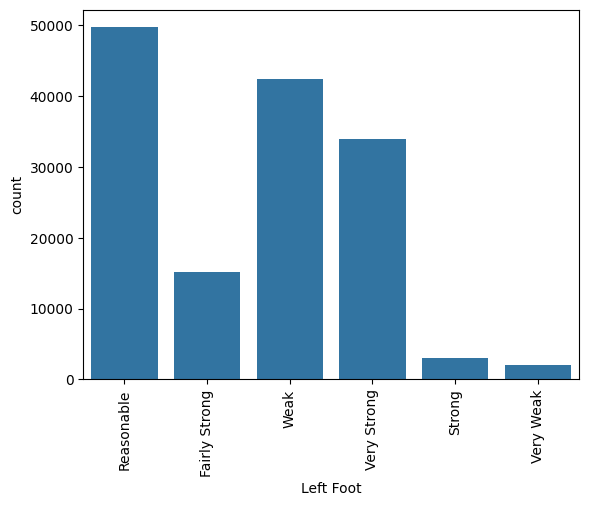

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x="Left Foot", data=df)

<Axes: xlabel='Right Foot', ylabel='count'>

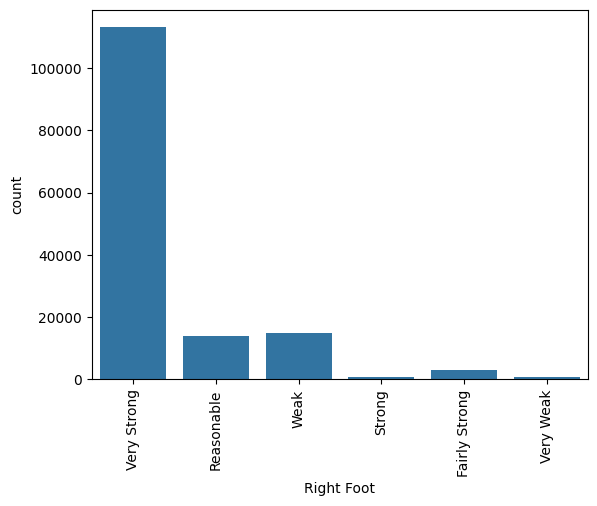

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x="Right Foot", data=df)

# Preprocessing

## Handle Miising Values

In [ ]:
df.isnull().sum()

,0
UID,174
Name,174
Position,174
Age,174
Nat,174
...,...
Cons,174
Amb,174
CR,174
HR,174


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
UID,0
Name,0
Position,0
Age,0
Nat,0
...,...
Cons,0
Amb,0
CR,0
HR,0


## Handle Position Attribute

In [ ]:
df["Position"].head()

,Position
0,"D (C), DM"
1,D (C)
2,"AM (RL), ST (C)"
3,GK
4,GK


เนื่องจากใน dataset แต่ละ player สามารถเล่นได้หลายตำแหน่ง อีกทั้งแต่ละตำแหน่งยังสามารถแบ่งแยกย่อยไปได้อีก เช่น กองกลาง สามารถแบ่งได้เป็น กองกลางฝั่งซ้าย `M(L)` กองกลางฝั่งขวา `M(R)` และกองกลางตรงกลาง `M(C)` ทำไมมีความซับซ้อนของข้อมูลค่อนข้างเยอะ จึงทำการ simplify โดยการกำหนดให้แต่ละ player เล่นได้เพียงตำแหน่งเดียว และลดรายละเอียดของแต่ละตำแหน่ง เช่น กองกลางคือ `M(C)` ไม่มีการแบ่งว่าเป็นกองกลางฝั่งใด

In [ ]:
df["Position"] = df["Position"].str.split(",").str[0]
df["Position"] = df["Position"].str.split("/").str[0]
df["Position"] = df["Position"].str.replace(r"\s*\(.*?\)", "", regex=True)
df["Position"].head()

,Position
0,D
1,D
2,AM
3,GK
4,GK


อีกทั้งตำแหน่งผู้รักษาประตู `GK` ค่าพลังที่ใช้ในเกมจะมีความแตกต่างจากผู้เล่นตำแหน่งอื่น (outfield players) กล่าวคือ features ที่ใช้ในการวิเคราะห์สำหรับ model จะแตกต่างกัน ดังนั้นในงานชิ้นนี้จะพิจารณาเฉพาะ outfield player เท่านั้น

In [ ]:
df = df[df["Position"] != "GK"]
len(df[df["Position"] == "GK"])

0

<Axes: xlabel='Position', ylabel='count'>

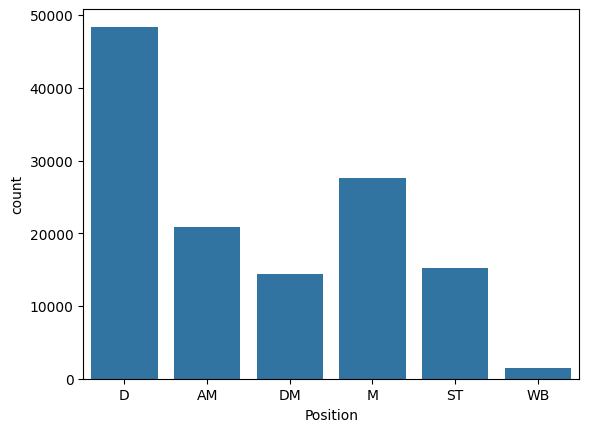

In [ ]:
sns.countplot(x="Position" , data=df)

เมื่อ plot countplot จะพบว่าตำแหน่ง wing back `WB` มีน้อยมาก ซึ่งจริง ๆ แล้ว wing back ก็คือตำแหน่งกองหลังริมเส้นที่จะยืนตำแหน่งสูงกว่ากองหลังทั่ว ๆ ไป ดังนั้นจึงทำการรวมเข้ากับตำแหน่งกองหลัง `D` ได้ เพื่อลดความซับซ้อนของ dataset

<Axes: xlabel='Position', ylabel='count'>

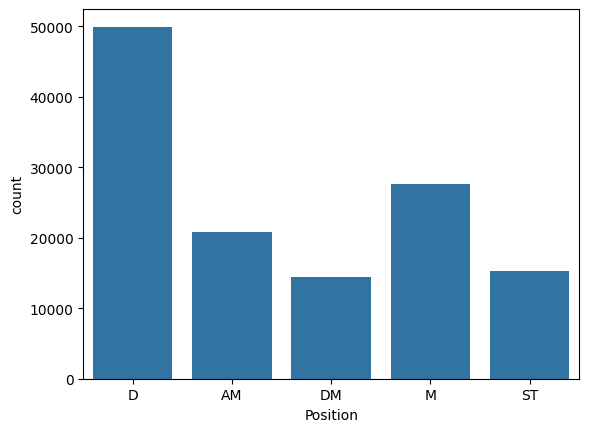

In [ ]:
df.loc[df["Position"] == "WB", "Position"] = "D"
sns.countplot(x="Position" , data=df)

## Handle Height and Weight Attributes

In [ ]:
df[["Height", "Weight"]].head()

,Height,Weight
0,189 cm,86 kg
1,188 cm,82 kg
2,171 cm,78 kg
6,175 cm,68 kg
7,176 cm,69 kg


ในข้อมูลส่วนสูง `Height` และน้ำหนัก `Weight` พบว่ามีหน่วยอยู่ในข้อมูลด้วย เพื่อให้ model สามารถนำไปคำนวณได้ จึงต้องทำการตัดหน่วยทิ้ง

In [ ]:
df.loc[:, "Height"] = df["Height"].astype(str)
df.loc[:, "Weight"] = df["Weight"].astype(str)
df.loc[:, "Height"] = df["Height"].str.extract(r"(\d+)", expand=False).astype(float).astype(int)
df.loc[:, "Weight"] = df["Weight"].str.extract(r"(\d+)", expand=False).astype(float).astype(int)
df[["Height", "Weight"]].head()

,Height,Weight
0,189,86
1,188,82
2,171,78
6,175,68
7,176,69


## Handle League Country Attribute

In [ ]:
df["Based"].head()

,Based
0,Switzerland (First League Group 1)
1,St Vincent (Club Championship)
2,Brazil (First Division)
6,Chile (First Division)
7,Brazil (Third Division)


จาก attribute `Based` จะพบว่ามีข้อมูลประเทศของ league ที่ player เล่นอยู่ (หน้าวงเล็บ) ซึ่งสามารถใช้ในการ represent แทน `Club` หรือ `Division` ซึ่งหมายถึงสโมสร หรือระดับ league ที่ player นั้น ๆ เล่นอยู่ได้ ซึ่งจะมีความซับซ้อนน้อยกว่าหากใช้ประเทศในการพิจารณาแทน เนื่องจากมี cardinality ที่น้อยกว่า

In [ ]:
df["League Country"] = df["Based"].str.split("(").str[0].str.strip()
df["League Country"].head()

,League Country
0,Switzerland
1,St Vincent
2,Brazil
6,Chile
7,Brazil


In [ ]:
df["League Country"].nunique()

195

## Handle Left Foot and Right Foot Attributes

ทำการแปลงความถนัดของเท้าในแต่ละข้างซึ่งเป็น oridnal variables ให้เป็น numerical variables

In [ ]:
df[["Left Foot", "Right Foot"]].head()

,Left Foot,Right Foot
0,Reasonable,Very Strong
1,Fairly Strong,Very Strong
2,Weak,Very Strong
6,Weak,Very Strong
7,Reasonable,Very Strong


In [ ]:
mapping_table = {
    "Very Weak": 1,
    "Weak": 2,
    "Reasonable": 3,
    "Fairly Strong": 4,
    "Strong": 5,
    "Very Strong": 6
}

df["Left Foot"] = df["Left Foot"].map(mapping_table)
df["Right Foot"] = df["Right Foot"].map(mapping_table)

df[["Left Foot", "Right Foot"]].head()

,Left Foot,Right Foot
0,3,6
1,4,6
2,2,6
6,2,6
7,3,6


## Handle Market Value and Wage Attributes

หากสถานะการซื้อขายของ player ถูกตั้งว่าไม่ได้มีไว้เพื่อขาย (Not for Sale) ค่า `AP` จะถูกตั้งเป็น 300 ล้านปอนด์ ซึ่งถือว่าเป็น outlier ที่เราไม่ต้องการ ดังนั้นจะไม่พิจารณาข้อมูลของ player ที่ `Transfer Value = "Not for Sale"`

In [ ]:
df[["Transfer Value", "AP"]][df["Transfer Value"] == "Not for Sale"].head()

,Transfer Value,AP
0,Not for Sale,Â£300M
1,Not for Sale,Â£300M
2,Not for Sale,Â£300M
6,Not for Sale,Â£300M
7,Not for Sale,Â£300M


In [ ]:
df = df[df["Transfer Value"] != "Not for Sale"]

In [ ]:
len(df[df["Transfer Value"] == "Not for Sale"])

0

In [ ]:
df["AP"].head()

,AP
4340,Â£44M
4342,Â£44M
4343,Â£44M
4344,Â£44M
4346,Â£43.5M


ทำการแปลงข้อมูลใน `AP` ให้เหลือเพียงแค่ตัวเลข รวมทั้งแปลงให้ราคาทั้งหมดอยู่ในหน่วยเดียวกัน (ข้อมูลประกอบไปด้วยหน่วยล้านปอนด์ (M) และพันปอนด์ (K)) เพื่อที่จะได้สามารถนำมาใช้ใน model ได้

In [ ]:
def transform_value(value):
    cleaned_value = value.replace("Ã‚Â£", "").replace("Â£", "").strip()

    if "M" in cleaned_value:
        return int(float(cleaned_value.replace("M", "").strip()) * 1_000_000)
    elif "K" in cleaned_value:
        return int(float(cleaned_value.replace("K", "").strip()) * 1_000)
    else:
        return int(float(cleaned_value))

In [ ]:
df["AP"] = df["AP"].apply(transform_value)
df["AP"].head()

,AP
4340,44000000
4342,44000000
4343,44000000
4344,44000000
4346,43500000


ทั้งสอง attributes `Transfer Value` และ `AP` (Asking Price) represent ถึง market value ของ player เหมือนกัน แต่ `Transfer Value` จะแสดงราคาเป็น range ส่วน `AP` จะแสดงราคาเป็นเลขนั้น ๆ เลย เพื่อลดความซับซ้อนในการวิเคราะห์จึงเลือกใช้ `AP` เป็น target variable เมื่อตัดสินใจได้แล้วว่าจะใช้ `AP` เป็น target variable จึงเป็นเปลี่ยนชื่อตัวแปรเป็น `Market Value` เพื่อให้สอดคล้องกับความหมาย

In [ ]:
df = df.rename(columns={"AP" : "Market Value"})
df["Market Value"].head()

,Market Value
4340,44000000
4342,44000000
4343,44000000
4344,44000000
4346,43500000


In [ ]:
df["Wage"].head()

,Wage
4340,"Â£16,750 p/w"
4342,"Â£105,000 p/w"
4343,"Â£65,000 p/w"
4344,"Â£80,000 p/w"
4346,"Â£40,000 p/w"


ทำการแปลงข้อมูลใน `Wage` ให้เหลือเพียงแค่ตัวเลข เพื่อที่จะได้สามารถนำมาใช้ใน model ได้

In [ ]:
def transform_wage(value):
    cleaned_value = value.replace("Ã‚Â£", "").replace("£", "").replace(" p/w", "").replace(",", "").strip()
    cleaned_value = cleaned_value.replace("Â", "").strip()
    return int(cleaned_value)

In [ ]:
df["Wage"] = df["Wage"].apply(transform_wage)
df["Wage"].head()

,Wage
4340,16750
4342,105000
4343,65000
4344,80000
4346,40000


## Remove Unnecessary Attributes

In [ ]:
df.drop(["Nat", "Club", "Division", "Based", "Transfer Value"], axis=1, inplace=True)
df.head()

,UID,Name,Position,Age,Birth Region,Height,Weight,Left Foot,Right Foot,Market Value,Wage,CA,PA,Wor,Vis,Tec,Tea,Tck,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat.1,Mar,L Th,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Ada,Vers,Temp,Spor,Prof,Pres,Loy,Inj Pr,Imp M,Dirt,Cont,Cons,Amb,CR,HR,WR,League Country
4340,78084541.0,Manuel Ugarte,DM,21.0,South America (South),182,77,3,6,44000000,16750,151.0,175.0,17.0,12.0,12.0,18.0,18.0,14.0,17.0,16.0,10.0,13.0,13.0,8.0,18.0,14.0,10.0,10.0,13.0,11.0,8.0,10.0,12.0,12.0,8.0,11.0,18.0,12.0,10.0,11.0,17.0,12.0,18.0,16.0,16.0,12.0,17.0,12.0,16.0,13.0,13.0,15.0,15.0,14.0,14.0,4.0,14.0,13.0,8.0,16.0,13.0,"7,550","6,399","6,145",Portugal
4342,43093171.0,Piotr ZieliÅ„ski,M,28.0,Central Europe,180,69,5,6,44000000,105000,155.0,159.0,12.0,16.0,17.0,15.0,7.0,10.0,14.0,10.0,14.0,17.0,14.0,14.0,16.0,7.0,4.0,15.0,10.0,9.0,7.0,12.0,15.0,17.0,14.0,13.0,11.0,14.0,15.0,14.0,9.0,12.0,11.0,12.0,15.0,13.0,10.0,13.0,13.0,14.0,12.0,14.0,15.0,13.0,14.0,6.0,11.0,7.0,13.0,12.0,13.0,"7,750","7,700","6,750",Italy
4343,62096282.0,Aleksandar MitroviÄ‡,ST,27.0,Eastern Europe,189,82,3,6,44000000,65000,148.0,155.0,15.0,12.0,15.0,15.0,10.0,19.0,15.0,6.0,13.0,13.0,12.0,16.0,13.0,9.0,3.0,7.0,15.0,17.0,17.0,6.0,12.0,15.0,16.0,13.0,14.0,14.0,10.0,3.0,13.0,13.0,16.0,16.0,14.0,10.0,16.0,12.0,13.0,8.0,7.0,7.0,14.0,13.0,15.0,6.0,14.0,15.0,14.0,14.0,14.0,"7,400","7,600","6,750",England
4344,29125842.0,Jarrod Bowen,M,25.0,UK & Ireland,174,70,6,3,44000000,80000,148.0,160.0,17.0,13.0,14.0,15.0,8.0,8.0,15.0,8.0,14.0,13.0,15.0,15.0,14.0,5.0,4.0,14.0,5.0,8.0,10.0,12.0,14.0,13.0,13.0,14.0,17.0,14.0,14.0,13.0,10.0,14.0,8.0,11.0,14.0,15.0,8.0,15.0,15.0,12.0,17.0,12.0,17.0,15.0,13.0,4.0,15.0,5.0,1.0,15.0,16.0,"7,400","7,400","5,500",England
4346,37059452.0,Pascal Struijk,D,22.0,Central Europe,190,75,6,4,43500000,40000,135.0,156.0,14.0,13.0,13.0,14.0,14.0,14.0,14.0,13.0,8.0,13.0,14.0,12.0,14.0,13.0,8.0,6.0,6.0,15.0,16.0,3.0,8.0,12.0,6.0,10.0,13.0,13.0,10.0,3.0,13.0,13.0,14.0,13.0,13.0,11.0,13.0,13.0,14.0,15.0,11.0,10.0,14.0,13.0,11.0,6.0,12.0,6.0,5.0,13.0,13.0,"6,750","6,750","5,850",England


## Handle Attributes Type

เนื่องจาก column `CR` `HR` และ `WR` ซึ่ง export มาจากเกมมี format ที่เป็น string เพื่อให้ model สามารถนำไปคำนวณได้ จึงต้องทำการแปลงให้เป็น dtypes integer ก่อน

In [ ]:
integer_columns = ["CR", "HR", "WR"]
df[integer_columns].dtypes

,0
CR,object
HR,object
WR,object


In [ ]:
integer_columns = ["CR", "HR", "WR"]
for col in integer_columns:
  df[col] = df[col].str.replace(",", "")
  df[col] = df[col].astype("int")

In [ ]:
df[integer_columns].dtypes

,0
CR,int64
HR,int64
WR,int64


แปลง categorical columns ทุก columns ให้เป็น dtypes category เพื่อให้ model XGBoost สามารถทำงานได้ โดยไม่ต้องทำการ encoding

In [ ]:
categorical_columns = df.select_dtypes(include="object").columns
for col in categorical_columns:
  df[col] = df[col].astype("category")

## Feature Selection

In [ ]:
X = df.drop(["UID", "Name", "Market Value"], axis=1)
y = df["Market Value"]

# Construct First Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

ใน XGBoost regression model สามารถให้ผลลัพธ์ที่อยู่นอกเหนือจาก range ของ target ที่นำไป train ได้ (มีโอกาสได้ค่าที่เป็นลบ) เพื่อแก้ปัญหานี้จึง take log กับ target ก่อนจะนำไป train

In [ ]:
y_train_log = np.log(y_train)

ใช้ `GridSearchCV` ในการ tune parameters เพื่อหา model ที่ดีที่สุด

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.015, 0.02, 0.025],
    "n_estimators": [800, 900, 1000],
    "max_depth": [8, 9, 10],
}

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, enable_categorical=True)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring="neg_mean_squared_error", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_log)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best RMSE Score: {(-grid_search.best_score_) ** 0.5:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.025, 'max_depth': 8, 'n_estimators': 1000}
Best RMSE Score: 0.5088


เมื่อได้ค่าที่ predict ออกมาแล้ว ก่อนจะนำไปใช้ได้ต้องแปลงกับให้เป็นค่าที่ถูกต้องก่อน โดยการใช้คำสั่ง `np.exp(y_pred_log)` โดยค่าที่จากฟังก์ชั่นจะมีค่าเท่ากับ $e^{(y\_pred\_log)}$

In [ ]:
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.exp(y_pred_log)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 125444.4245088804
Mean Squared Error (MSE): 532122223795.9568
Root Mean Squared Error (RMSE): 729467.0820509702
R-Squared (R2 Score): 0.8653700351715088


# Construct Second Model

หลังจากได้ model แรกแล้ว เราสามารถเพิ่มประสิทธิภาพต่อไปได้อีก โดยการ train model ที่สอง แต่ใช้เฉพาะ feature ที่สำคัญเท่านั้น

In [ ]:
feature_importance = best_model.feature_importances_
important_features = [feature for feature, score in zip(X.columns, feature_importance) if score > 0.01]
important_features

['Age', 'Wage', 'CA', 'PA', 'CR', 'League Country']

สังเกตว่า features ที่ส่งผลกับ target ได้แก่ `Age` `Wage` `CA` (ความสามารถในปัจจุบัน) `PA` (ความสามารถที่สามารถไปถึงได้ในอนาคต) `CR` (ชื่อเสียงในประเทศที่เล่นอยู่) และ `League Country` ซึ่งถือว่าสมเหตุสมผลมาก ๆ

In [ ]:
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [ ]:
model_2 = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=8,
    n_estimators=1000,
    learning_rate=0.025,
    random_state=42,
    enable_categorical=True
)

model_2.fit(X_train_reduced, y_train_log)

y_pred_log_2 = model_2.predict(X_test_reduced)
y_pred = np.exp(y_pred_log_2)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 121486.6678419524
Mean Squared Error (MSE): 461563192272.2488
Root Mean Squared Error (RMSE): 679384.4215701806
R-Squared (R2 Score): 0.8832218647003174


พบว่า R-Sqaured เพิ่มขึ้นเป็น `0.8832` จาก model แรกที่มี R-Sqaured คือ `0.8654` และ RMSE ลดลงจาก `729467.0821` เหลือ `679384.4216`

In [ ]:
mx = df["Market Value"].max()
mn = df["Market Value"].min()
value_range = mx - mn
good_rmse_threshold = value_range * 0.1
good_rmse_threshold

4399900.0

rule of thumb ของการพิจารณาว่าค่า RMSE นั้นควรที่จะมีค่าน้อยกว่า 10 % ของช่วงใน target variable พบว่า good_rmse_threshold = `4399900.00` ซึ่ง RMSE จาก model ของเรานั้นน้อยกว่าถึง 6 เท่า และค่า R-Squared เองที่สูงถึง `0.8832` จึงทำให้สามารถสรุปได้ว่า model นี้นั้นมีประสิทธิภาพและความแม่นยำที่สูง

# Model Evaluation on Dataset

In [ ]:
df_sample = df.sample(25)
X_sample = df_sample[important_features]
y_sample = df_sample["Market Value"]

In [ ]:
y_sample_pred_log = model_2.predict(X_sample)
y_sample_pred = np.exp(y_sample_pred_log)

In [ ]:
for i in range(25):
  actual = y_sample[i]
  predict = y_sample_pred[i]
  error = abs(actual - predict)
  abs_per_err = error / actual * 100
  print(f"Actual: {actual:10.2f} | Predict: {predict:10.2f} | Error: {error:10.2f} | ABS % Error: {abs_per_err:8.2f} %")

Actual:   22000.00 | Predict:   16320.84 | Error:    5679.16 | ABS % Error:    25.81 %
Actual:   46500.00 | Predict:   39488.81 | Error:    7011.19 | ABS % Error:    15.08 %
Actual:   60000.00 | Predict:   21986.19 | Error:   38013.81 | ABS % Error:    63.36 %
Actual:    7000.00 | Predict:    6266.04 | Error:     733.96 | ABS % Error:    10.49 %
Actual:    4700.00 | Predict:    5242.12 | Error:     542.12 | ABS % Error:    11.53 %
Actual:   17750.00 | Predict:   49024.64 | Error:   31274.64 | ABS % Error:   176.20 %
Actual:    3400.00 | Predict:    3585.15 | Error:     185.15 | ABS % Error:     5.45 %
Actual:    2300.00 | Predict:   26147.92 | Error:   23847.92 | ABS % Error:  1036.87 %
Actual:   76000.00 | Predict:    3410.18 | Error:   72589.82 | ABS % Error:    95.51 %
Actual:   50000.00 | Predict:   50560.84 | Error:     560.84 | ABS % Error:     1.12 %
Actual:   13250.00 | Predict:   13778.19 | Error:     528.19 | ABS % Error:     3.99 %
Actual:   19750.00 | Predict:   18716.93 | 

เมื่อลองนำ model ไปใช้กับตัว dataset ที่ถูกสุ่มมา 25 records พบว่าทำงานได้ค่อนข้างแม่นยำ แต่จะมีปัญหาในบางตัวอย่างที่มี error ที่เยอะมาก ๆ อาจจะเกิดจาก variance ของตัว target เองที่มีมาก (มีการกระจายตัวของข้อมูลมาก) สามารถเพิ่มความแม่นยำได้โดยลดช่วงของ target เช่น market value ขั้นต่ำที่จะนำมาพิจารณาคือ 1 ล้านปอนด์ เป็นต้น